<a href="https://colab.research.google.com/github/montesinos8/TFM_48763797W_Predicci-n-de-accidentes-en-el-rea-Metropolitana-de-Madrid/blob/main/TFM_ANALISIS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
pip install astral

In [ ]:
pip install geopandas folium matplotlib


In [ ]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from scipy.stats import ttest_ind
import folium
from folium.plugins import HeatMap
plt.style.use('seaborn-v0_8')
#plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**EDA**

In [ ]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/TFM/csv_tfm/ACCIDENTES_FINAL_DB.csv'
accidentes_db = pd.read_csv(file_path, sep=',')
accidentes_db

,FECHA,FRANJA HORARIA,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,TIPO ACCIDENTE,TIPO PERSONA,TIPO VEHICULO,SEXO,LESIVIDAD,FESTIVO,TMEDIA,PRECIPITACION,RACHA,CONFINAMIENTO,RESTRICCION HORARIA,RESTRICCION TERRITORIAL,NUM VEHICULOS
0,2010-01-01,Madrugada,VIERNES,RETIRO,AUTOVIA M-30 CALZADA 1 KM. ...,COLISIÓN MÚLTIPLE,VIAJERO,VARIOS,HOMBRE,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
1,2010-01-01,Mañana,VIERNES,CARABANCHEL,PASEO DE SANTA MARIA DE LA CABEZA NUM ...,CHOQUE CON OBJETO FIJO,CONDUCTOR,TURISMO,HOMBRE,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
2,2010-01-01,Mañana,VIERNES,CIUDAD LINEAL,AUTOVIA M-30 CALZADA 2 KM. ...,CAÍDA,CONDUCTOR,MOTOCICLETA,HOMBRE,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
3,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,COLISIÓN MÚLTIPLE,VIAJERO,NO ASIGNADO,MUJER,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
4,2010-01-01,Mañana,VIERNES,SALAMANCA,AUTOVIA M-30 CALZADA 1 KM. ...,CHOQUE CON OBJETO FIJO,TESTIGO,NO ASIGNADO,HOMBRE,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474903,2023-12-31,Noche,DOMINGO,CARABANCHEL,CALL EL TOBOSO,COLISIÓN DOBLE,PASAJERO,TURISMO,Hombre,Asistencia Inmediata,0,7.050000,0.00,9.675000,0,0,0,5400000
474904,2023-12-31,Noche,DOMINGO,CHAMARTIN,CALL GENERAL LOPEZ POZAS,COLISIÓN DOBLE,CONDUCTOR,BICICLETA,Hombre,Asistencia Inmediata,0,7.050000,0.00,9.675000,0,0,0,5400000
474905,2023-12-31,Mañana,DOMINGO,PUENTE DE VALLECAS,CALL RAFAEL FERNANDEZ HIJICOS,OTRAS CAUSAS,CONDUCTOR,TURISMO,Desconocido,Indeterminado,0,7.050000,0.00,9.675000,0,0,0,5400000
474906,2023-12-31,Tarde,DOMINGO,CHAMARTIN,AVDA AMERICA,OTRAS CAUSAS,CONDUCTOR,AUTOBUS-AUTOCAR,Hombre,Sin Asistencia,0,7.050000,0.00,9.675000,0,0,0,5400000


In [ ]:
#  valores faltantes en el dataset
missing_values = accidentes_db.isnull().sum()
missing_values[missing_values > 0]


,0


In [ ]:
file_path = '/content/drive/My Drive/TFM/csv_tfm/ACCIDENTES_FINAL_DB_H.csv'
accidentes_db_H = pd.read_csv(file_path, sep=',')
accidentes_db_H

,FECHA,FRANJA HORARIA,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,TIPO ACCIDENTE,TIPO PERSONA,TIPO VEHICULO,SEXO,LESIVIDAD,FESTIVO,TMEDIA,PRECIPITACION,RACHA,CONFINAMIENTO,RESTRICCION HORARIA,RESTRICCION TERRITORIAL,NUM VEHICULOS
0,2010-01-01 00:00:00,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,COLISIÓN DOBLE,CONDUCTOR,TURISMO,HOMBRE,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
1,2010-01-01 00:00:00,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,COLISIÓN DOBLE,CONDUCTOR,TURISMO,HOMBRE,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
2,2010-01-01 00:00:00,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,COLISIÓN DOBLE,VIAJERO,TURISMO,MUJER,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
3,2010-01-01 02:00:00,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA,COLISIÓN MÚLTIPLE,VIAJERO,TURISMO,MUJER,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
4,2010-01-01 02:00:00,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA,COLISIÓN MÚLTIPLE,CONDUCTOR,TURISMO,MUJER,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474903,2023-12-31 21:00:00,Noche,DOMINGO,SALAMANCA,CALL ALCALA,OTRAS CAUSAS,CONDUCTOR,TURISMO,Hombre,Indeterminado,0,7.050000,0.00,9.675000,0,0,0,5400000
474904,2023-12-31 21:00:00,Noche,DOMINGO,VILLAVERDE,AVDA GRAN VIA DE VILLAVERDE,COLISIÓN DOBLE,PASAJERO,TURISMO,Hombre,Asistencia Inmediata,0,7.050000,0.00,9.675000,0,0,0,5400000
474905,2023-12-31 21:00:00,Noche,DOMINGO,HORTALEZA,GTA RIO URUBAMBA,COLISIÓN DOBLE,CONDUCTOR,TURISMO,Hombre,Sin Asistencia,0,7.050000,0.00,9.675000,0,0,0,5400000
474906,2023-12-31 22:00:00,Noche,DOMINGO,USERA,AVDA ANDALUCIA,ATROPELLO,CONDUCTOR,DESCONOCIDO,Desconocido,Indeterminado,0,7.050000,0.00,9.675000,0,0,0,5400000


In [ ]:
accidentes_db['FECHA'] = pd.to_datetime(accidentes_db['FECHA'], errors='coerce')




##FESTIVOS y COVID

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch

In [ ]:

periodo_covid = (pd.to_datetime('2020-03-14'), pd.to_datetime('2021-05-09'))
periodo_antes = (pd.to_datetime('2018-03-14'), pd.to_datetime('2019-05-09'))
periodo_despues = (pd.to_datetime('2022-03-14'), pd.to_datetime('2023-05-09'))

datos_covid = accidentes_diarios[(accidentes_diarios['FECHA'] >= periodo_covid[0]) &
                                 (accidentes_diarios['FECHA'] <= periodo_covid[1])]
datos_antes = accidentes_diarios[(accidentes_diarios['FECHA'] >= periodo_antes[0]) &
                                 (accidentes_diarios['FECHA'] <= periodo_antes[1])]
datos_despues = accidentes_diarios[(accidentes_diarios['FECHA'] >= periodo_despues[0]) &
                                   (accidentes_diarios['FECHA'] <= periodo_despues[1])]



<ipython-input-35-d1ea3253081c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos_antes['NUM_ACCIDENTES'], shade=True, color='blue', label='Año Antes COVID')
<ipython-input-35-d1ea3253081c>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos_covid['NUM_ACCIDENTES'], shade=True, color='red', label='Durante COVID')
<ipython-input-35-d1ea3253081c>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(datos_despues['NUM_ACCIDENTES'], shade=True, color='green', label='Año Después COVID')


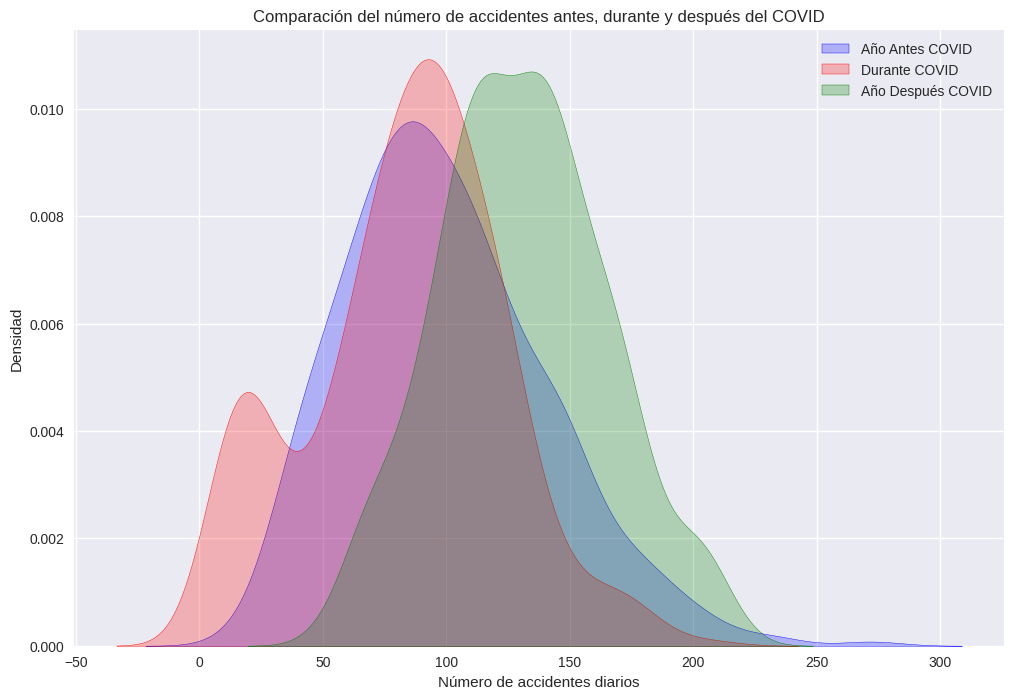

In [ ]:
plt.figure(figsize=(12, 8))


sns.kdeplot(datos_antes['NUM_ACCIDENTES'], shade=True, color='blue', label='Año Antes COVID')
sns.kdeplot(datos_covid['NUM_ACCIDENTES'], shade=True, color='red', label='Durante COVID')
sns.kdeplot(datos_despues['NUM_ACCIDENTES'], shade=True, color='green', label='Año Después COVID')


plt.title('Comparación del número de accidentes antes, durante y después del COVID')
plt.xlabel('Número de accidentes diarios')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()


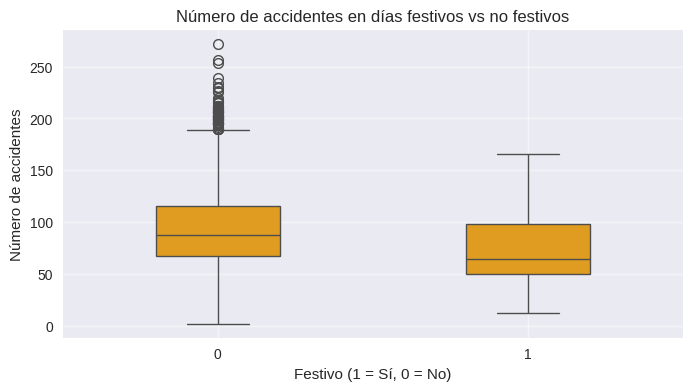

In [ ]:
# prompt: se pueden hacer los boxplots anterirores meno gorods y naranaja

plt.figure(figsize=(8, 4))  # Adjust figure size
sns.boxplot(x='FESTIVO', y='NUM_ACCIDENTES', data=accidentes_diarios, color='orange', width=0.4) # Set color and width
plt.title('Número de accidentes en días festivos vs no festivos')
plt.xlabel('Festivo (1 = Sí, 0 = No)')
plt.ylabel('Número de accidentes')
plt.grid(True, alpha=0.5) # Adjust grid transparency
plt.show()

## CLIMA

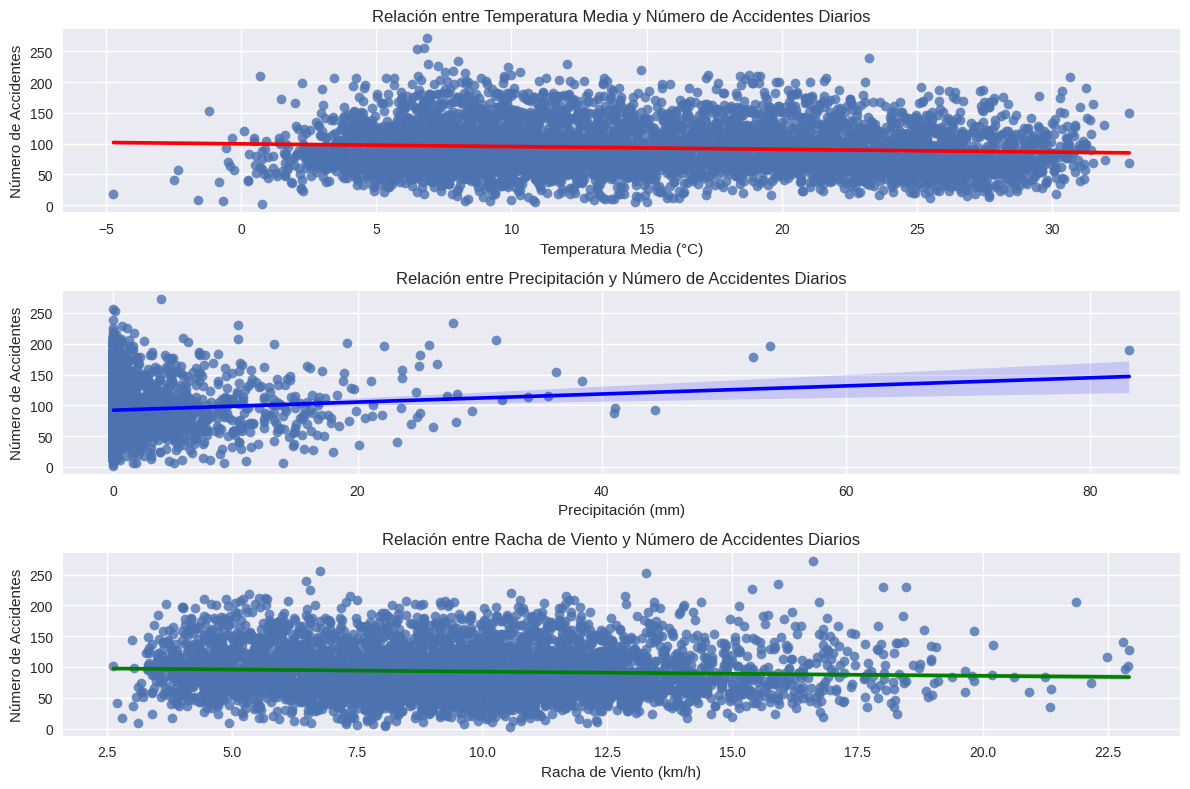

Correlaciones entre número de accidentes y variables climáticas:
                NUM_ACCIDENTES    TMEDIA  PRECIPITACION     RACHA
NUM_ACCIDENTES        1.000000 -0.088944       0.064245 -0.056983
TMEDIA               -0.088944  1.000000      -0.113752  0.151412
PRECIPITACION         0.064245 -0.113752       1.000000  0.173370
RACHA                -0.056983  0.151412       0.173370  1.000000


In [ ]:
accidentes_db_H['FECHA'] = pd.to_datetime(accidentes_db_H['FECHA'], errors='coerce')
accidentes_diarios = (
    accidentes_db_H
    .groupby(accidentes_db_H['FECHA'].dt.date)
    .agg({
        'FECHA': 'count',
        'TMEDIA': 'mean',
        'PRECIPITACION': 'mean',
        'RACHA': 'mean'
    })
    .rename(columns={'FECHA': 'NUM_ACCIDENTES'})  # Cambiar el nombre de la columna de conteo a NUM_ACCIDENTES
    .reset_index()
)


plt.figure(figsize=(12, 8))

# Subplot 1: Temperatura media vs. Número de accidentes
plt.subplot(3, 1, 1)
sns.regplot(data=accidentes_diarios, x='TMEDIA', y='NUM_ACCIDENTES', line_kws={"color": "red"})
plt.title('Relación entre Temperatura Media y Número de Accidentes Diarios')
plt.xlabel('Temperatura Media (°C)')
plt.ylabel('Número de Accidentes')

# Subplot 2: Precipitación vs. Número de accidentes
plt.subplot(3, 1, 2)
sns.regplot(data=accidentes_diarios, x='PRECIPITACION', y='NUM_ACCIDENTES', line_kws={"color": "blue"})
plt.title('Relación entre Precipitación y Número de Accidentes Diarios')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Número de Accidentes')

# Subplot 3: Rachas de viento vs. Número de accidentes
plt.subplot(3, 1, 3)
sns.regplot(data=accidentes_diarios, x='RACHA', y='NUM_ACCIDENTES', line_kws={"color": "green"})
plt.title('Relación entre Racha de Viento y Número de Accidentes Diarios')
plt.xlabel('Racha de Viento (km/h)')
plt.ylabel('Número de Accidentes')

plt.tight_layout()
plt.show()

correlaciones = accidentes_diarios[['NUM_ACCIDENTES', 'TMEDIA', 'PRECIPITACION', 'RACHA']].corr()
print("Correlaciones entre número de accidentes y variables climáticas:")
print(correlaciones)

## MAPA CALOR

In [ ]:
file_path = '/content/drive/My Drive/TFM/csv_tfm/Distritos.json'
distritos_gdf = gpd.read_file(file_path, driver="ESRI Shapefile")
distritos_gdf.head()


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver TopoJSON does not support open option DRIVER
  return ogr_read(


,id,COD_DIS,COD_DIS_TX,NOMBRE,DISTRI_MAY,DISTRI_MT,Area_m2,geometry
0,None,1,01,Centro,CENTRO,CENTRO,None,"POLYGON ((-3.72295 40.41399, -3.72049 40.41395..."
1,None,2,02,Arganzuela,ARGANZUELA,ARGANZUELA,None,"POLYGON ((-3.69188 40.40845, -3.69259 40.40802..."
2,None,3,03,Retiro,RETIRO,RETIRO,None,"POLYGON ((-3.66521 40.40634, -3.66515 40.40646..."
3,None,4,04,Salamanca,SALAMANCA,SALAMANCA,None,"POLYGON ((-3.6587 40.41868, -3.65916 40.42147,..."
4,None,5,05,Chamartín,CHAMARTIN,CHAMARTÍN,None,"POLYGON ((-3.6606 40.44461, -3.66119 40.44567,..."


In [ ]:
distinct_names = distritos_gdf['DISTRI_MAY'].unique()
distinct_names

array(['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTIN',
       'TETUAN', 'CHAMBERI', 'FUENCARRAL - EL PARDO', 'MONCLOA - ARAVACA',
       'LATINA', 'CARABANCHEL', 'USERA', 'PUENTE DE VALLECAS',
       'MORATALAZ', 'CIUDAD LINEAL', 'HORTALEZA', 'VILLAVERDE',
       'VILLA DE VALLECAS', 'VICALVARO', 'SAN BLAS - CANILLEJAS',
       'BARAJAS'], dtype=object)

In [ ]:
distritos_gdf['DISTRI_MAY'] = distritos_gdf['DISTRI_MAY'].str.strip().str.upper()

accidentes_db_H['DISTRITO'] = accidentes_db_H['DISTRITO'].str.strip().str.upper()

nombre_distritos_correspondencia = {
    'FUENCARRAL': 'FUENCARRAL - EL PARDO',
    'MONCLOA': 'MONCLOA - ARAVACA',
    'SAN BLAS': 'SAN BLAS - CANILLEJAS',
}


accidentes_db_H['DISTRITO'] = accidentes_db_H['DISTRITO'].replace(nombre_distritos_correspondencia)

accidentes_geo = accidentes_db_H.merge(distritos_gdf[['DISTRI_MAY', 'geometry']],
                                       left_on='DISTRITO', right_on='DISTRI_MAY', how='left')

accidentes_geo.head()





,FECHA,FRANJA HORARIA,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,TIPO ACCIDENTE,TIPO PERSONA,TIPO VEHICULO,SEXO,LESIVIDAD,FESTIVO,TMEDIA,PRECIPITACION,RACHA,CONFINAMIENTO,RESTRICCION HORARIA,RESTRICCION TERRITORIAL,NUM VEHICULOS,DISTRI_MAY,geometry
0,2010-01-01 00:00:00,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,COLISIÓN DOBLE,CONDUCTOR,TURISMO,HOMBRE,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658,CHAMARTIN,"POLYGON ((-3.6606 40.44461, -3.66119 40.44567,..."
1,2010-01-01 00:00:00,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,COLISIÓN DOBLE,CONDUCTOR,TURISMO,HOMBRE,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658,CHAMARTIN,"POLYGON ((-3.6606 40.44461, -3.66119 40.44567,..."
2,2010-01-01 00:00:00,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,COLISIÓN DOBLE,VIAJERO,TURISMO,MUJER,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658,CHAMARTIN,"POLYGON ((-3.6606 40.44461, -3.66119 40.44567,..."
3,2010-01-01 02:00:00,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA,COLISIÓN MÚLTIPLE,VIAJERO,TURISMO,MUJER,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658,PUENTE DE VALLECAS,"POLYGON ((-3.68193 40.3613, -3.68121 40.36105,..."
4,2010-01-01 02:00:00,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA,COLISIÓN MÚLTIPLE,CONDUCTOR,TURISMO,MUJER,Indeterminado,1,5.566667,0.05,18.233333,0,0,0,4307658,PUENTE DE VALLECAS,"POLYGON ((-3.68193 40.3613, -3.68121 40.36105,..."


In [ ]:
null_geometry_count = accidentes_geo['geometry'].isnull().sum()

print(f"Number of null values in 'geometry' column: {null_geometry_count}")

Number of null values in 'geometry' column: 5


In [ ]:
null_geometry_districts = accidentes_geo[accidentes_geo['geometry'].isnull()]['DISTRITO'].unique()

print("Districts with null geometry:")
null_geometry_districts

Districts with null geometry:


array(['DESCONOCIDO'], dtype=object)

In [ ]:
accidentes_geo = accidentes_geo.dropna(subset=['geometry'])


null_geometry_count = accidentes_geo['geometry'].isnull().sum()
print(f"Number of null values in 'geometry' column after dropping: {null_geometry_count}")

Number of null values in 'geometry' column after dropping: 0


In [ ]:
if not isinstance(accidentes_geo, gpd.GeoDataFrame):
    accidentes_geo = gpd.GeoDataFrame(accidentes_geo, geometry='geometry')

In [ ]:
madrid_coords = [40.416775, -3.703790]

# Crear el mapa base con Folium
mapa_accidentes = folium.Map(location=madrid_coords, zoom_start=12)


In [ ]:
accidentes_geo['AÑO'] = pd.to_datetime(accidentes_geo['FECHA']).dt.year

accidentes_agrupados = accidentes_geo.groupby(['AÑO', 'DISTRITO', 'geometry']).size().reset_index(name='NUM_ACCIDENTES')




In [ ]:
accidentes_agrupados

,AÑO,DISTRITO,geometry,NUM_ACCIDENTES
0,2010,ARGANZUELA,"POLYGON ((-3.69188 40.40845, -3.69259 40.40802...",1424
1,2010,BARAJAS,"POLYGON ((-3.53134 40.44708, -3.53155 40.4473,...",297
2,2010,CARABANCHEL,"POLYGON ((-3.70465 40.39524, -3.70735 40.3959,...",1608
3,2010,CENTRO,"POLYGON ((-3.72295 40.41399, -3.72049 40.41395...",1962
4,2010,CHAMARTIN,"POLYGON ((-3.6606 40.44461, -3.66119 40.44567,...",2044
...,...,...,...,...
289,2023,TETUAN,"POLYGON ((-3.68712 40.47415, -3.68886 40.47443...",1969
290,2023,USERA,"POLYGON ((-3.68193 40.3613, -3.68276 40.36336,...",2149
291,2023,VICALVARO,"POLYGON ((-3.55348 40.35579, -3.55329 40.35602...",926
292,2023,VILLA DE VALLECAS,"POLYGON ((-3.55348 40.35579, -3.5537 40.3561, ...",1414


In [ ]:
file_path = '/content/drive/My Drive/TFM/csv_tfm/accidentes_agrupados.csv'
accidentes_agrupado = pd.read_csv(file_path, sep=',')
accidentes_agrupado

,AÑO,DISTRITO,geometry,NUM_ACCIDENTES
0,2010,ARGANZUELA,POLYGON ((-3.691878101293638 40.40844766703115...,1424
1,2010,BARAJAS,POLYGON ((-3.5313437723292873 40.4470788333828...,297
2,2010,CARABANCHEL,POLYGON ((-3.704648445658397 40.39523726818294...,1608
3,2010,CENTRO,POLYGON ((-3.722948939149007 40.41398783429981...,1962
4,2010,CHAMARTIN,POLYGON ((-3.660597257775262 40.44460875880641...,2044
...,...,...,...,...
289,2023,TETUAN,POLYGON ((-3.687117972932146 40.47414965070467...,1969
290,2023,USERA,POLYGON ((-3.681927832974973 40.36129624343591...,2149
291,2023,VICALVARO,POLYGON ((-3.553484369372025 40.35578607707303...,926
292,2023,VILLA DE VALLECAS,POLYGON ((-3.553484369372025 40.35578607707303...,1414


In [ ]:

accidentes_agrupados = gpd.GeoDataFrame(accidentes_agrupados, geometry='geometry')


if accidentes_agrupados.crs is None:
    accidentes_agrupados = accidentes_agrupados.set_crs("EPSG:4326")  # Asignar CRS WGS 84

accidentes_agrupados['centroid'] = accidentes_agrupados.centroid

accidentes_agrupados['latitud'] = accidentes_agrupados['centroid'].y
accidentes_agrupados['longitud'] = accidentes_agrupados['centroid'].x


accidentes_final = accidentes_agrupados[['AÑO', 'DISTRITO', 'NUM_ACCIDENTES', 'latitud', 'longitud']]

<ipython-input-25-1a94a0fd15c3>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  accidentes_agrupados['centroid'] = accidentes_agrupados.centroid


In [ ]:
accidentes_final

,AÑO,DISTRITO,NUM_ACCIDENTES,latitud,longitud
0,2010,ARGANZUELA,1424,40.398026,-3.696797
1,2010,BARAJAS,297,40.475577,-3.574535
2,2010,CARABANCHEL,1608,40.378869,-3.737093
3,2010,CENTRO,1962,40.417317,-3.705281
4,2010,CHAMARTIN,2044,40.457461,-3.678131
...,...,...,...,...,...
289,2023,TETUAN,1969,40.460643,-3.699994
290,2023,USERA,2149,40.375939,-3.703004
291,2023,VICALVARO,926,40.393555,-3.572780
292,2023,VILLA DE VALLECAS,1414,40.349929,-3.615986


In [ ]:
from google.colab import files

accidentes_final.to_csv('accidentes_final.csv', index=False)
files.download('accidentes_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

mapa_calor = folium.Map(location=[40.416775, -3.703790], zoom_start=12)


heat_data = [[row['latitud'], row['longitud'], row['NUM_ACCIDENTES']] for index, row in accidentes_final.iterrows()]


HeatMap(heat_data, radius=20, blur=5, max_zoom=1).add_to(mapa_calor)


In [ ]:
mapa_calor

## ANALISIS TEMPORAL

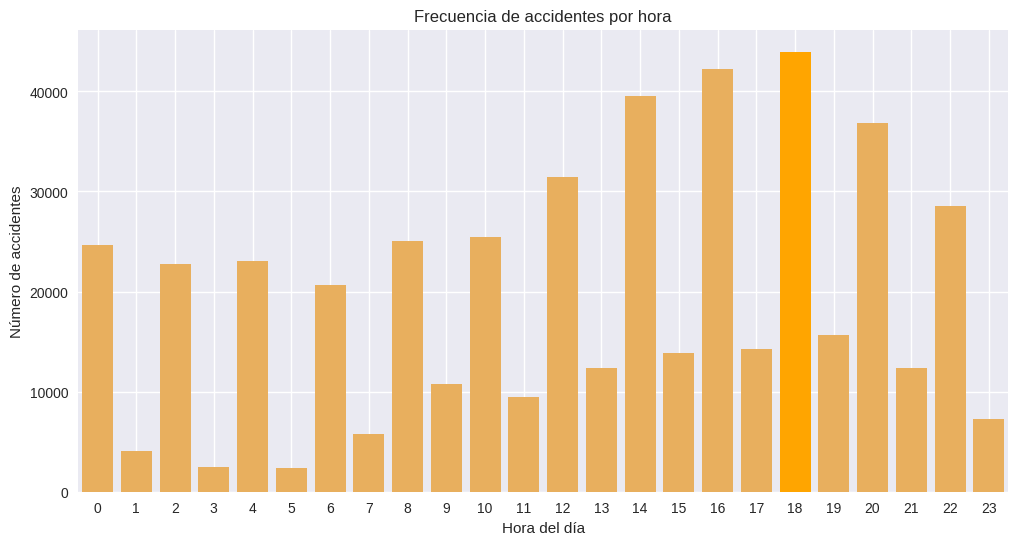

In [ ]:

accidentes_db_H['Hora'] = accidentes_db_H['FECHA'].str.split().str[1].str.split(':').str[0]

accidentes_db_H['Hora'] = pd.to_numeric(accidentes_db_H['Hora'], errors='coerce')

accidentes_db_H = accidentes_db_H.dropna(subset=['Hora'])

frecuencia_horas = accidentes_db_H['Hora'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=frecuencia_horas.index, y=frecuencia_horas.values, color="#FFB347") # Light orange color
max_index = frecuencia_horas.idxmax()
max_bar = bars.patches[list(frecuencia_horas.index).index(max_index)]
max_bar.set_facecolor("#FFA500") # Strong orange


plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Frecuencia de accidentes por hora')
plt.xticks(range(24))  # Mostrar todas las horas en el eje x
plt.grid(True)
plt.show()

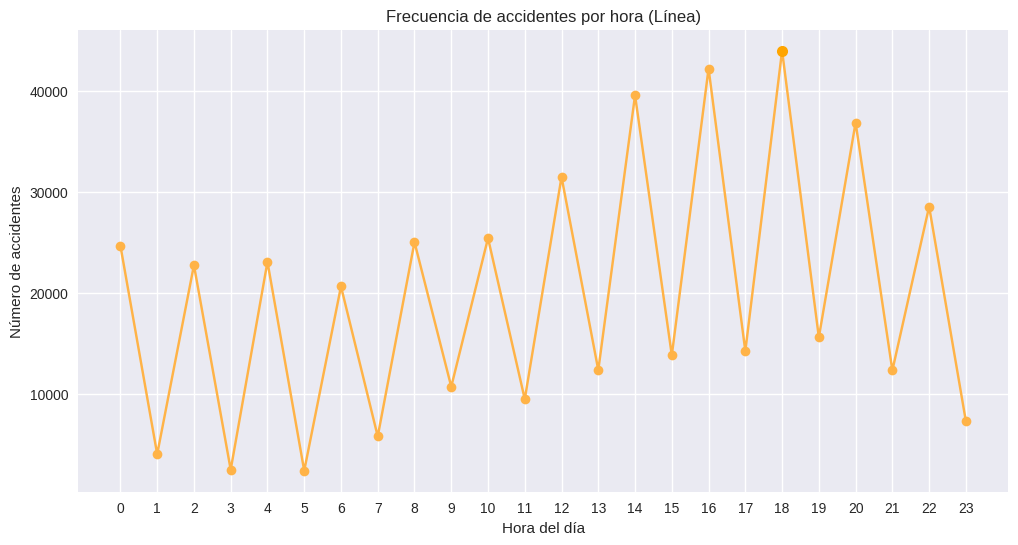

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(frecuencia_horas.index, frecuencia_horas.values, marker='o', linestyle='-', color="#FFB347") # Light orange color with markers

max_index = frecuencia_horas.idxmax()
plt.plot(max_index, frecuencia_horas[max_index], marker='o', markersize=8, color="#FFA500") # Strong orange marker


plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Frecuencia de accidentes por hora (Línea)')
plt.xticks(range(24))  # Mostrar todas las horas en el eje x
plt.grid(True)
plt.show()

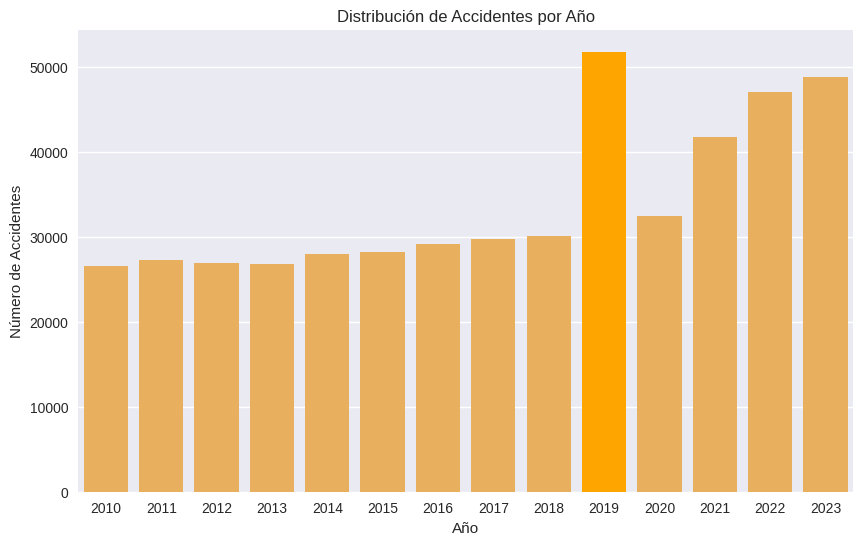

In [ ]:
accidentes_db['AÑO'] = pd.to_datetime(accidentes_db['FECHA']).dt.year
accident_per_year = accidentes_db['AÑO'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=accident_per_year.index, y=accident_per_year.values, color="#FFB347") # Light orange color
max_index = accident_per_year.idxmax()
max_bar = bars.patches[list(accident_per_year.index).index(max_index)]
max_bar.set_facecolor("#FFA500") # Strong orange
plt.title('Distribución de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.show()


In [ ]:
accidentes_db['FECHA'] = pd.to_datetime(accidentes_db['FECHA'])

accidentes_db['Dia_Semana'] = accidentes_db['FECHA'].dt.dayofweek

day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

accidentes_db['Nombre_Dia'] = accidentes_db['Dia_Semana'].map(lambda x: day_names[x])

ordered_days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

accidentes_per_day = accidentes_db['Nombre_Dia'].value_counts().reindex(ordered_days)

accidentes_per_day

,count
DIA SEMANA,
VIERNES,80750
JUEVES,72357
MIERCOLES,71597
MARTES,70200
LUNES,66096
SABADO,60393
DOMINGO,53515


In [ ]:
accidents_per_day = accidentes_db['DIA SEMANA'].value_counts()
ordered_days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

accidentes_per_day = accidentes_db['DIA SEMANA'].value_counts().reindex(ordered_days)

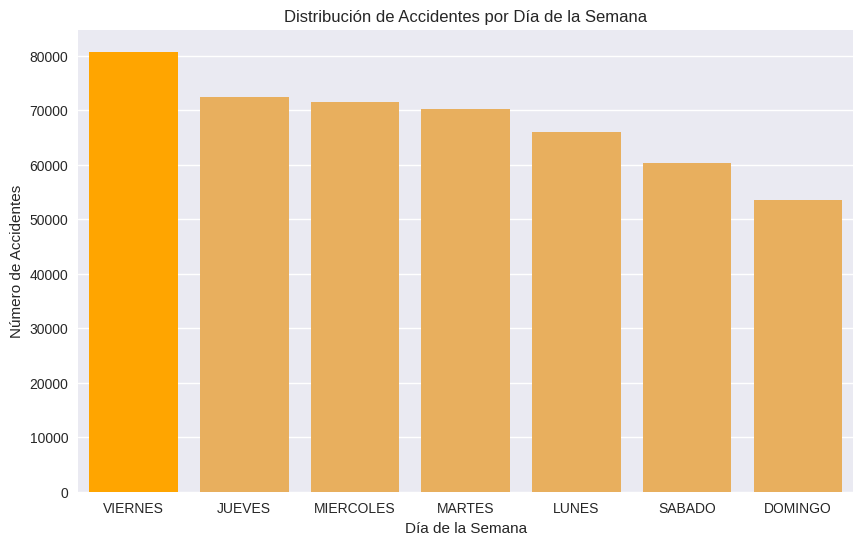

In [ ]:

accidents_per_day = accidentes_db['DIA SEMANA'].value_counts()

plt.figure(figsize=(10, 6))

bars = sns.barplot(x=accidents_per_day.index, y=accidents_per_day.values, color="#FFB347") # Light orange color


max_index = accidents_per_day.idxmax()

max_bar = bars.patches[list(accidents_per_day.index).index(max_index)]

max_bar.set_facecolor("#FFA500") # Strong orange color


plt.title('Distribución de Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.show()

Los accidentes son más frecuentes los viernes, con una tendencia decreciente hacia el fin de semana. Esto podría sugerir que las actividades al final de la semana laboral contribuyen a un aumento en los accidentes.

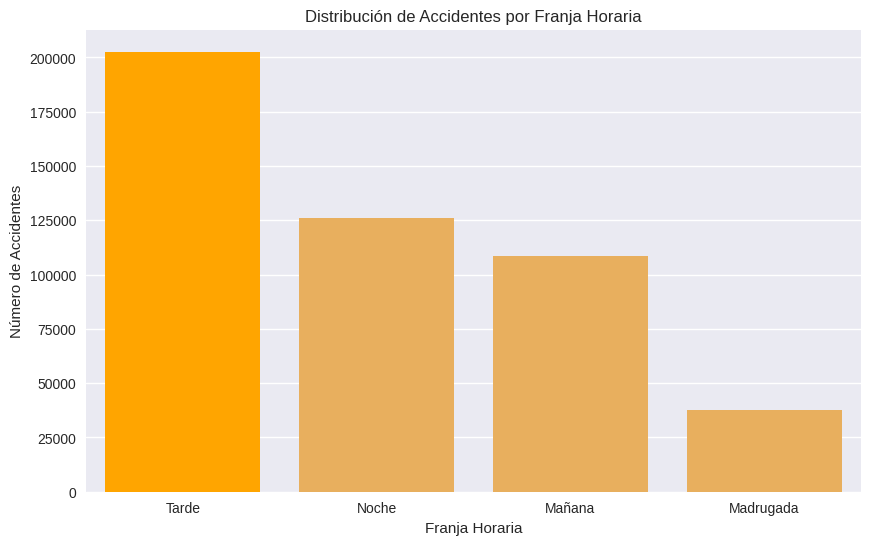

In [ ]:
accidents_per_time = accidentes_db['FRANJA HORARIA'].value_counts()


plt.figure(figsize=(10,6))

bars = sns.barplot(x=accidents_per_time.index, y=accidents_per_time.values, color="#FFB347") # Light orange color

max_index = accidents_per_time.idxmax()

max_bar = bars.patches[list(accidents_per_time.index).index(max_index)]

max_bar.set_facecolor("#FFA500") # Strong orange color
plt.title('Distribución de Accidentes por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Número de Accidentes')
plt.show()

La mayoría de los accidentes ocurren en la tarde, seguidos por la noche y la mañana. La madrugada tiene significativamente menos accidentes, lo que podría estar relacionado con menos tráfico en esas horas.

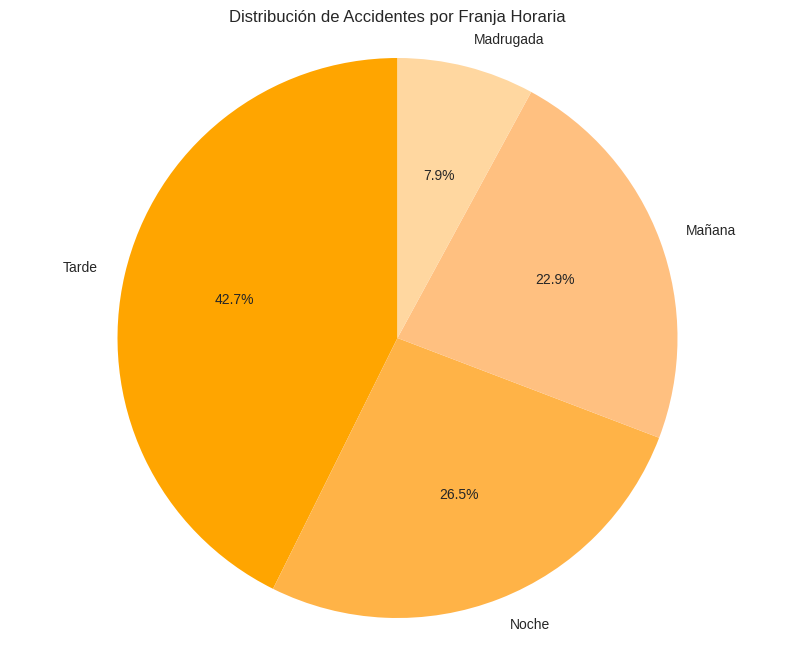

In [ ]:

plt.figure(figsize=(10, 8))
plt.pie(accidents_per_time.values, labels=accidents_per_time.index, autopct='%1.1f%%', startangle=90, colors=['#FFA500', '#FFB347', '#FFC080', '#FFD7A0']) # Orange shades
plt.title('Distribución de Accidentes por Franja Horaria')
plt.axis('equal')
plt.show()

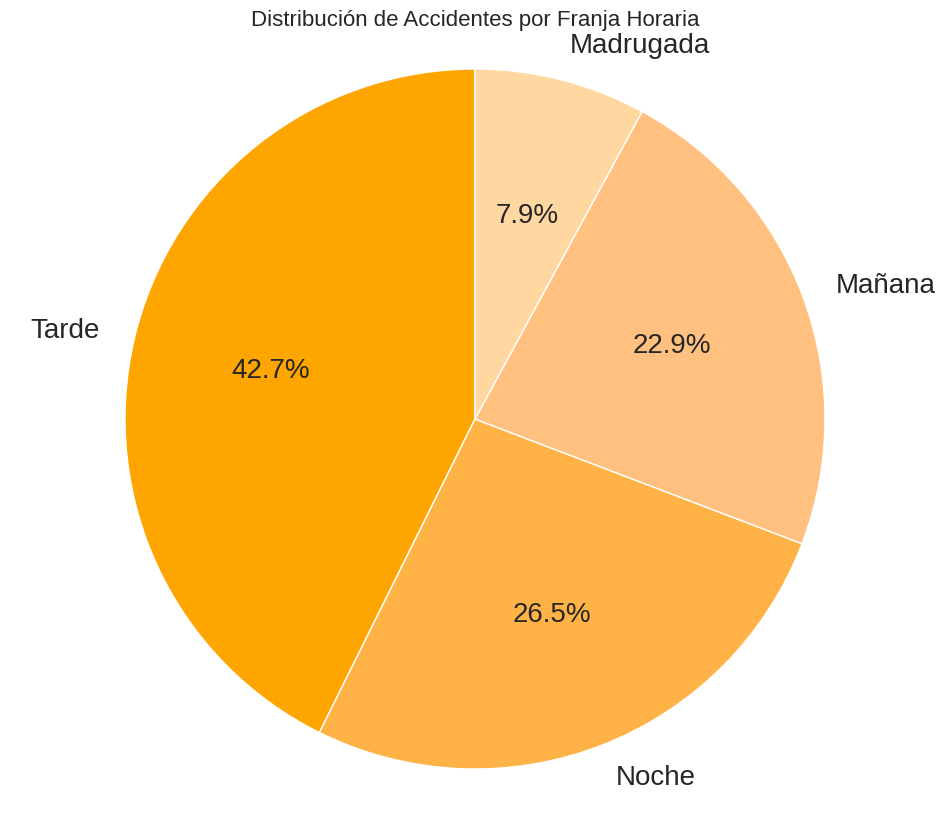

In [ ]:

plt.figure(figsize=(12, 10))
plt.pie(accidents_per_time.values, labels=accidents_per_time.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 20},
        colors=['#FFA500', '#FFB347', '#FFC080', '#FFD7A0'],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Distribución de Accidentes por Franja Horaria', fontsize=16)
plt.axis('equal')

In [ ]:

accidentes_db['MES'] = pd.to_datetime(accidentes_db['FECHA']).dt.month


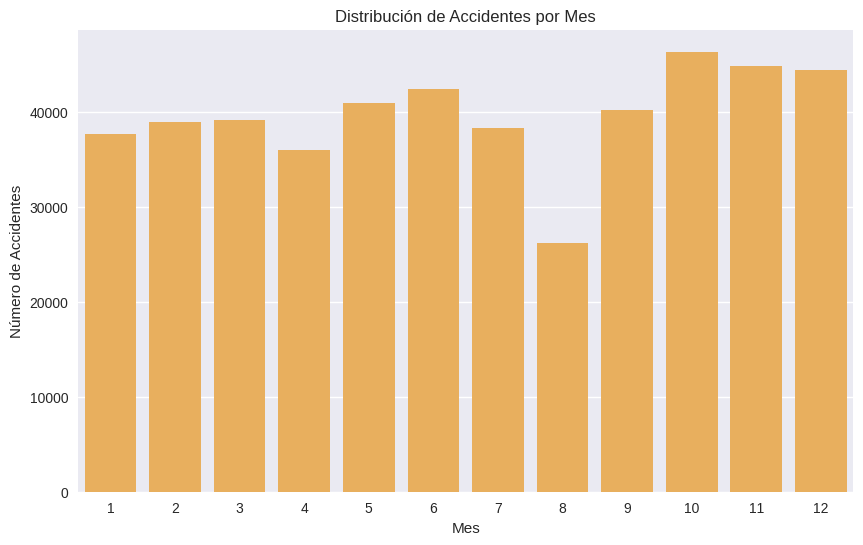

In [ ]:

accidentes_db['MES'] = pd.to_datetime(accidentes_db['FECHA']).dt.month
accidents_per_month = accidentes_db['MES'].value_counts()


plt.figure(figsize=(10,6))
bar=sns.barplot(x=accidents_per_month.index, y=accidents_per_month.values,color="#FFB347")

max_index = accidents_per_month.idxmax()
max_bar = bars.patches[list(accidents_per_month.index).index(max_index)]
max_bar.set_facecolor("#FFA500") # Strong orange color

plt.title('Distribución de Accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')
plt.show()


<ipython-input-26-0d2e9ae127a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_per_district.index, y=accidents_per_district.values, palette='Oranges_r')


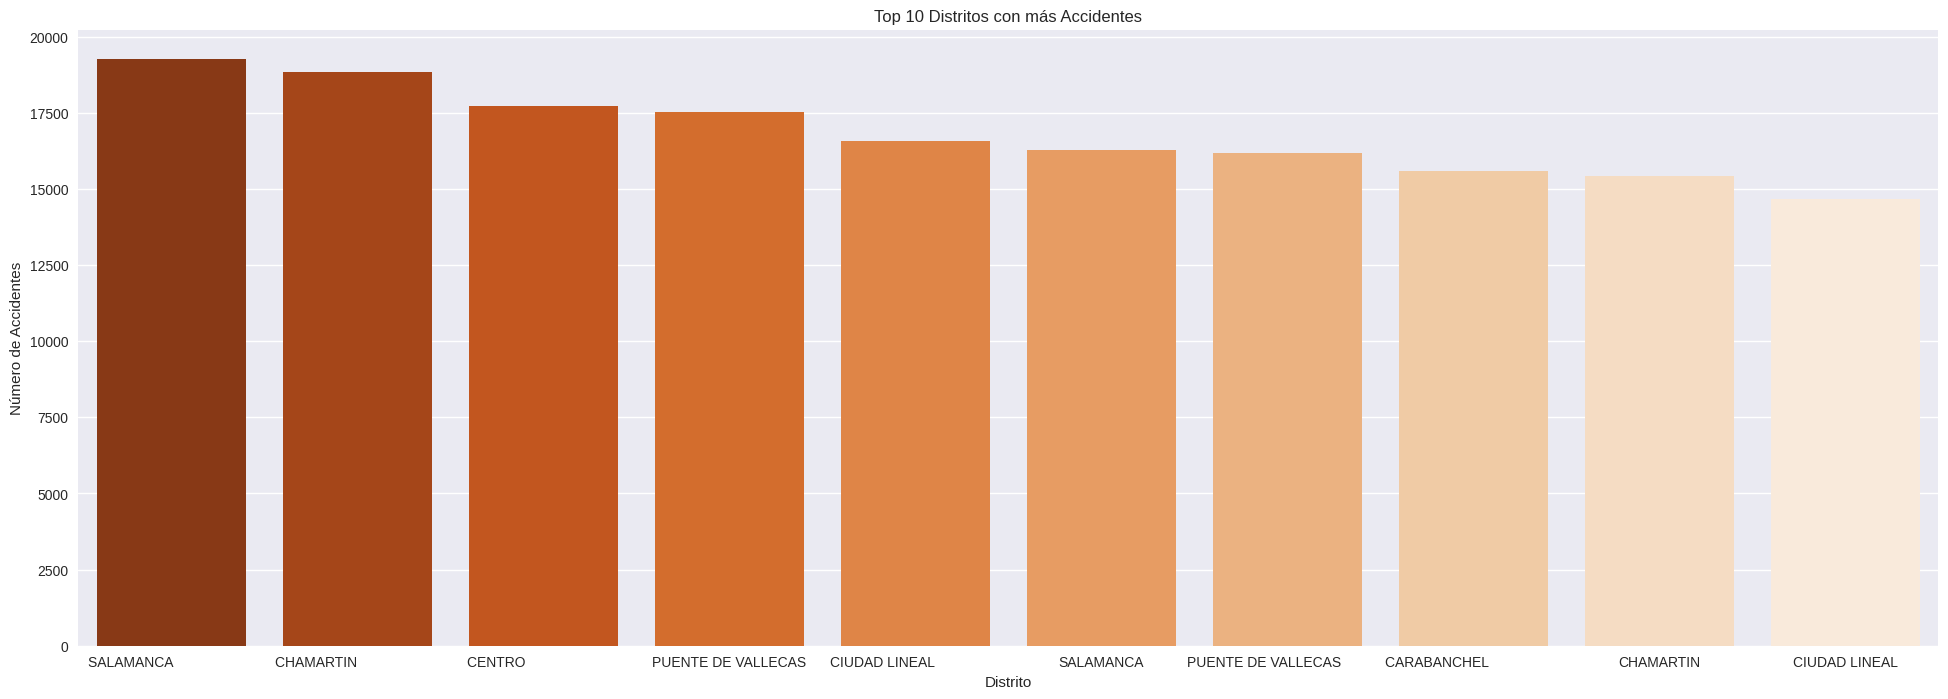

In [ ]:
accidents_per_district = accidentes_db['DISTRITO'].value_counts().head(10)  # Tomar los 10 distritos más frecuentes


plt.figure(figsize=(24,8))
sns.barplot(x=accidents_per_district.index, y=accidents_per_district.values, palette='Oranges_r')
plt.title('Top 10 Distritos con más Accidentes')
plt.xlabel('Distrito')
plt.ylabel('Número de Accidentes')
plt.show()

Salamanca y Chamartín son los distritos con más accidentes. Esto podría estar relacionado con densidades de tráfico específicas o características geográficas y de infraestructura en estos distritos.

In [ ]:
db['fecha'] = pd.to_datetime(db['fecha'], errors='coerce', dayfirst=True)
db

,FRANJA HORARIA,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,TIPO ACCIDENTE,TIPO PERSONA,Tipo Vehiculo,SEXO,LESIVIDAD,fecha,tmed,velmedia,LLUVIA,condicion_extrema,FESTIVO
0,Madrugada,LUNES,USERA,CALLE DE SAN BASILIO,ATROPELLO,PEATON,NO ASIGNADO,HOMBRE,HG,2018-01-01,8.0,3.1,0.0,0.0,0
1,Madrugada,LUNES,USERA,CALLE DE SAN BASILIO,ATROPELLO,PEATON,NO ASIGNADO,HOMBRE,HG,2018-01-01,7.3,5.6,0.0,0.0,0
2,Madrugada,LUNES,USERA,CALLE DE SAN BASILIO,ATROPELLO,PEATON,NO ASIGNADO,HOMBRE,HG,2018-01-01,-1.9,5.6,1.0,1.0,0
3,Madrugada,LUNES,USERA,CALLE DE SAN BASILIO,ATROPELLO,TESTIGO,NO ASIGNADO,HOMBRE,IL,2018-01-01,8.0,3.1,0.0,0.0,0
4,Madrugada,LUNES,USERA,CALLE DE SAN BASILIO,ATROPELLO,TESTIGO,NO ASIGNADO,HOMBRE,IL,2018-01-01,7.3,5.6,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377017,Mañana,DOMINGO,CARABANCHEL,CALL HALCONERO DEL REY,COLISIÓN DOBLE,CONDUCTOR,TURISMO,Mujer,NO ASIGNADA,2019-03-11,15.5,9.7,0.0,0.0,0
1377018,Mañana,DOMINGO,CARABANCHEL,CALL HALCONERO DEL REY,COLISIÓN DOBLE,CONDUCTOR,TURISMO,Mujer,NO ASIGNADA,2019-03-11,4.1,7.2,1.0,0.0,0
1377019,Mañana,DOMINGO,CARABANCHEL,CALL HALCONERO DEL REY,COLISIÓN DOBLE,CONDUCTOR,TURISMO,Hombre,NO ASIGNADA,2019-03-11,15.0,5.0,0.0,0.0,0
1377020,Mañana,DOMINGO,CARABANCHEL,CALL HALCONERO DEL REY,COLISIÓN DOBLE,CONDUCTOR,TURISMO,Hombre,NO ASIGNADA,2019-03-11,15.5,9.7,0.0,0.0,0


## 1. Análisis de Distribución de Variables
### Distribución temporal:

cantidad de datos por año para ver si esta descompensada.

In [ ]:
import pandas as pd


db['fecha'] = pd.to_datetime(db['fecha'], errors='coerce', dayfirst=True)
db['AÑO'] = db['fecha'].dt.year


conteo_anual = db.groupby('AÑO').size()

print(conteo_anual)


AÑO
2010.0    30333
2011.0    32925
2012.0    30831
2013.0    30945
2014.0    33042
2015.0    31230
2016.0    36012
2017.0    35574
2018.0    36426
2019.0    60906
2020.0    38151
2021.0    49542
2022.0    55200
2023.0    41692
dtype: int64


In [ ]:
distritos_unicos = db['DISTRITO'].unique()

print(distritos_unicos)


['USERA' 'HORTALEZA' 'SAN BLAS' 'CIUDAD LINEAL' 'FUENCARRAL' 'MORATALAZ'
 'ARGANZUELA' 'CENTRO' 'SALAMANCA' 'CHAMARTIN' 'CARABANCHEL' 'RETIRO'
 'TETUAN' 'MONCLOA' 'CHAMBERI' 'VICALVARO' 'VILLAVERDE'
 'VILLA DE VALLECAS' 'PUENTE DE VALLECAS' 'LATINA' 'BARAJAS' 'CHAMARTÍN'
 'TETUÁN' 'CHAMBERÍ' 'VICÁLVARO' 'DESCONOCIDO']


              DISTRITO  ACCIDENTES  POBLACION
0           ARGANZUELA       66643   157867.0
1              BARAJAS       21456    48793.0
2          CARABANCHEL       86770   253797.0
3               CENTRO       86159   149718.0
4            CHAMARTIN       99495   143422.0
5             CHAMBERI       73324   137401.0
6        CIUDAD LINEAL       90553   212529.0
7           FUENCARRAL       73502   246640.0
8            HORTALEZA       50072   180462.0
9               LATINA       66367   233808.0
10             MONCLOA       73539   116903.0
11           MORATALAZ       35945    94197.0
12  PUENTE DE VALLECAS       97342   227595.0
13              RETIRO       72069   118516.0
14           SALAMANCA      103683   143800.0
15            SAN BLAS       68417   158118.0
16              TETUAN       67872   153789.0
17               USERA       51288   134791.0
18           VICALVARO       19303    78667.0
19   VILLA DE VALLECAS       33493   124858.0
20          VILLAVERDE       39715

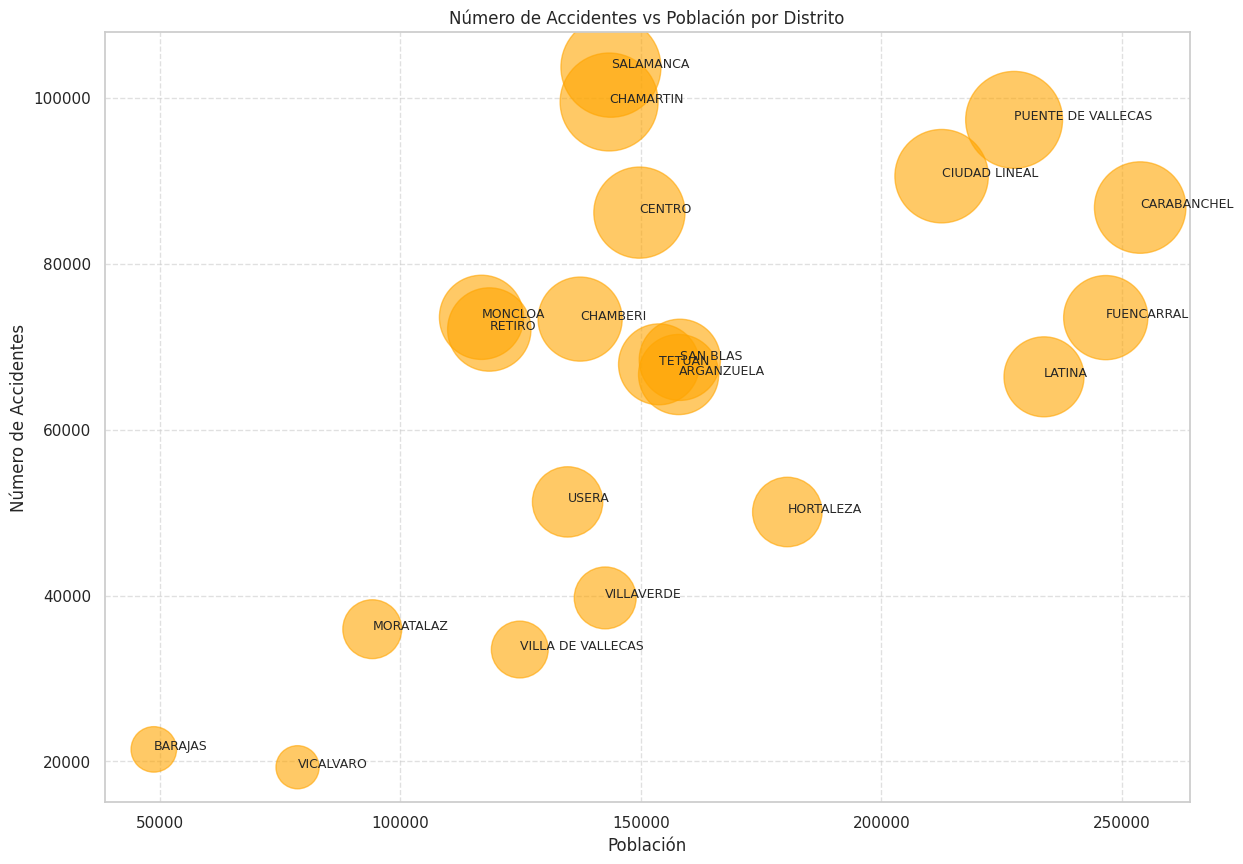

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

poblacion = {
    'USERA': 134791,
    'HORTALEZA': 180462,
    'SAN BLAS': 158118,
    'CIUDAD LINEAL': 212529,
    'FUENCARRAL': 246640,
    'MORATALAZ': 94197,
    'ARGANZUELA': 157867,
    'CENTRO': 149718,
    'SALAMANCA': 143800,
    'CHAMARTIN': 143422,
    'CARABANCHEL': 253797,
    'RETIRO': 118516,
    'TETUAN': 153789,
    'MONCLOA': 116903,
    'CHAMBERI': 137401,
    'VICALVARO': 78667,
    'VILLAVERDE': 142608,
    'VILLA DE VALLECAS': 124858,
    'PUENTE DE VALLECAS': 227595,
    'LATINA': 233808,
    'BARAJAS': 48793,
}


df_poblacion = pd.DataFrame(list(poblacion.items()), columns=['DISTRITO', 'POBLACION'])

db['DISTRITO'] = db['DISTRITO'].replace({
    'CHAMARTÍN': 'CHAMARTIN',
    'CHAMBERÍ': 'CHAMBERI',
    'VICÁLVARO': 'VICALVARO',
    'TETUÁN': 'TETUAN'
})


df_accidentes = db.groupby('DISTRITO').size().reset_index(name='ACCIDENTES')

df_merged = pd.merge(df_accidentes, df_poblacion, on='DISTRITO', how='left')

df_merged = df_merged.dropna().reset_index(drop=True)

print(df_merged)

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

bubble_size_factor = 0.05  # Ajusta este valor según sea necesario

plt.scatter(df_merged['POBLACION'], df_merged['ACCIDENTES'], s=df_merged['ACCIDENTES'] * bubble_size_factor, alpha=0.6, color='orange')

for i in range(len(df_merged)):
    plt.text(df_merged['POBLACION'][i], df_merged['ACCIDENTES'][i], df_merged['DISTRITO'][i], fontsize=9)

plt.title('Número de Accidentes vs Población por Distrito')
plt.xlabel('Población')
plt.ylabel('Número de Accidentes')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Distribución por distrito y lugar de accidente:

<ipython-input-20-b8049b840429>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='DISTRITO', data=db, order=top_distritos, palette=palette)
<ipython-input-20-b8049b840429>:16: UserWarning: The palette list has more values (14) than needed (10), which may not be intended.
  sns.countplot(y='DISTRITO', data=db, order=top_distritos, palette=palette)


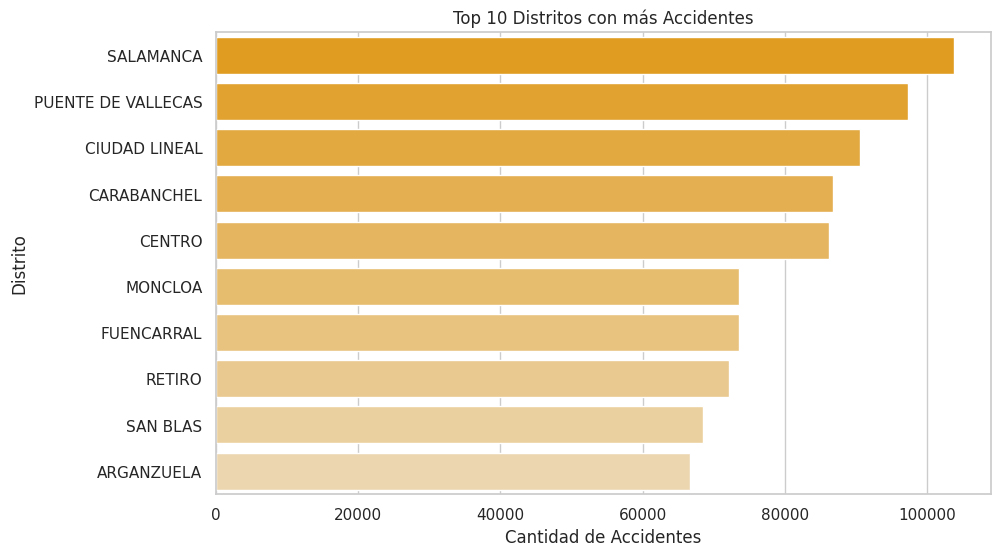

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

palette = sns.light_palette("orange", reverse=True, n_colors=14)

plt.figure(figsize=(10,6))

top_distritos = db['DISTRITO'].value_counts().nlargest(10).index

sns.countplot(y='DISTRITO', data=db, order=top_distritos, palette=palette)
plt.title('Top 10 Distritos con más Accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Distrito')
plt.show()



<ipython-input-25-0d1e0cee041b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='LUGAR ACCIDENTE', data=db, order=top_distritos, palette=palette)
<ipython-input-25-0d1e0cee041b>:11: UserWarning: The palette list has more values (14) than needed (10), which may not be intended.
  sns.countplot(y='LUGAR ACCIDENTE', data=db, order=top_distritos, palette=palette)


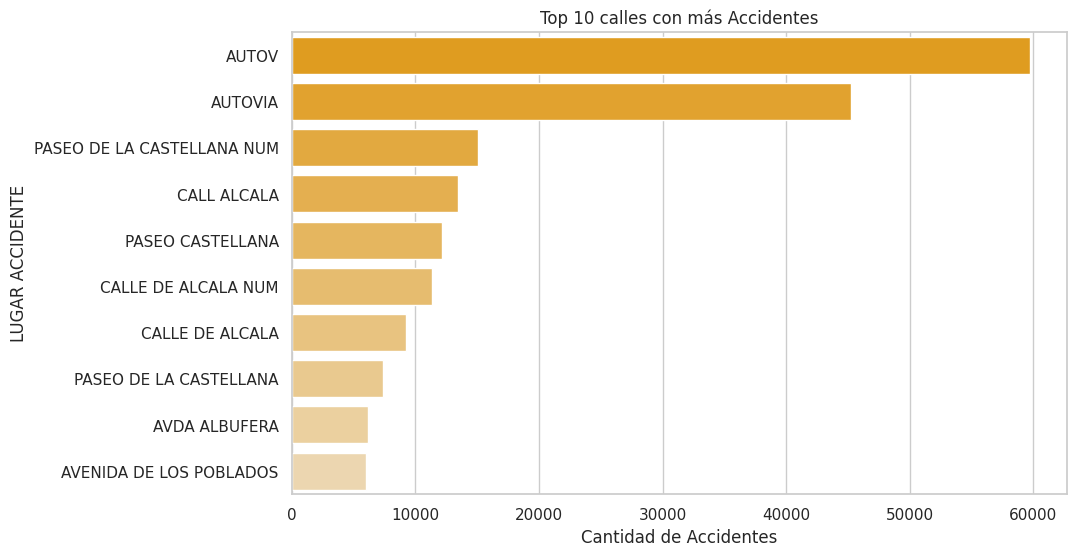

In [ ]:
sns.set(style="whitegrid")

palette = sns.light_palette("orange", reverse=True, n_colors=14)

plt.figure(figsize=(10,6))

top_distritos = db['LUGAR ACCIDENTE'].value_counts().nlargest(10).index

sns.countplot(y='LUGAR ACCIDENTE', data=db, order=top_distritos, palette=palette)
plt.title('Top 10 calles con más Accidentes')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('LUGAR ACCIDENTE')
plt.show()


In [ ]:
import pandas as pd
lugares = [
    "AUTOV", "AUTOVIA", "PASEO DE LA CASTELLANA NUM", "CALL ALCALA",
    "PASEO CASTELLANA", "CALLE DE ALCALA NUM", "CALLE DE ALCALA",
    "PASEO DE LA CASTELLANA", "AVDA ALBUFERA", "AVENIDA DE LOS POBLADOS"
]

distritos_por_lugar = db[db['LUGAR ACCIDENTE'].isin(lugares)]
distritos_por_lugar = distritos_por_lugar.groupby('LUGAR ACCIDENTE')['DISTRITO'].agg(lambda x: x.mode()[0]).reset_index()


print(distritos_por_lugar)


              LUGAR ACCIDENTE            DISTRITO
0                       AUTOV       CIUDAD LINEAL
1                     AUTOVIA       CIUDAD LINEAL
2               AVDA ALBUFERA  PUENTE DE VALLECAS
3     AVENIDA DE LOS POBLADOS         CARABANCHEL
4                 CALL ALCALA           SALAMANCA
5             CALLE DE ALCALA           SALAMANCA
6         CALLE DE ALCALA NUM           SALAMANCA
7            PASEO CASTELLANA           CHAMARTÍN
8      PASEO DE LA CASTELLANA           CHAMARTIN
9  PASEO DE LA CASTELLANA NUM           CHAMARTIN


In [ ]:
import pandas as pd

autovias = db[db['LUGAR ACCIDENTE'].isin(['AUTOV', 'AUTOVIA'])]

distritos_autovias = autovias.groupby(['LUGAR ACCIDENTE', 'DISTRITO']).size().reset_index(name='Cantidad de Accidentes')


print(distritos_autovias)


   LUGAR ACCIDENTE            DISTRITO  Cantidad de Accidentes
0            AUTOV          ARGANZUELA                    5613
1            AUTOV             BARAJAS                     181
2            AUTOV         CARABANCHEL                    1909
3            AUTOV              CENTRO                      39
4            AUTOV           CHAMARTÍN                    3442
5            AUTOV       CIUDAD LINEAL                    9039
6            AUTOV         DESCONOCIDO                      15
7            AUTOV          FUENCARRAL                    4874
8            AUTOV           HORTALEZA                     152
9            AUTOV              LATINA                    1920
10           AUTOV             MONCLOA                    5646
11           AUTOV           MORATALAZ                    4833
12           AUTOV  PUENTE DE VALLECAS                    8143
13           AUTOV              RETIRO                    6997
14           AUTOV           SALAMANCA                 

## 2. Análisis de Variables Numéricas

<ipython-input-10-63b78c5c579f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Tipo Vehiculo Agrupado', data=db, order=db['Tipo Vehiculo Agrupado'].value_counts().index, palette=palette)
<ipython-input-10-63b78c5c579f>:23: UserWarning: The palette list has more values (18) than needed (11), which may not be intended.
  sns.countplot(y='Tipo Vehiculo Agrupado', data=db, order=db['Tipo Vehiculo Agrupado'].value_counts().index, palette=palette)


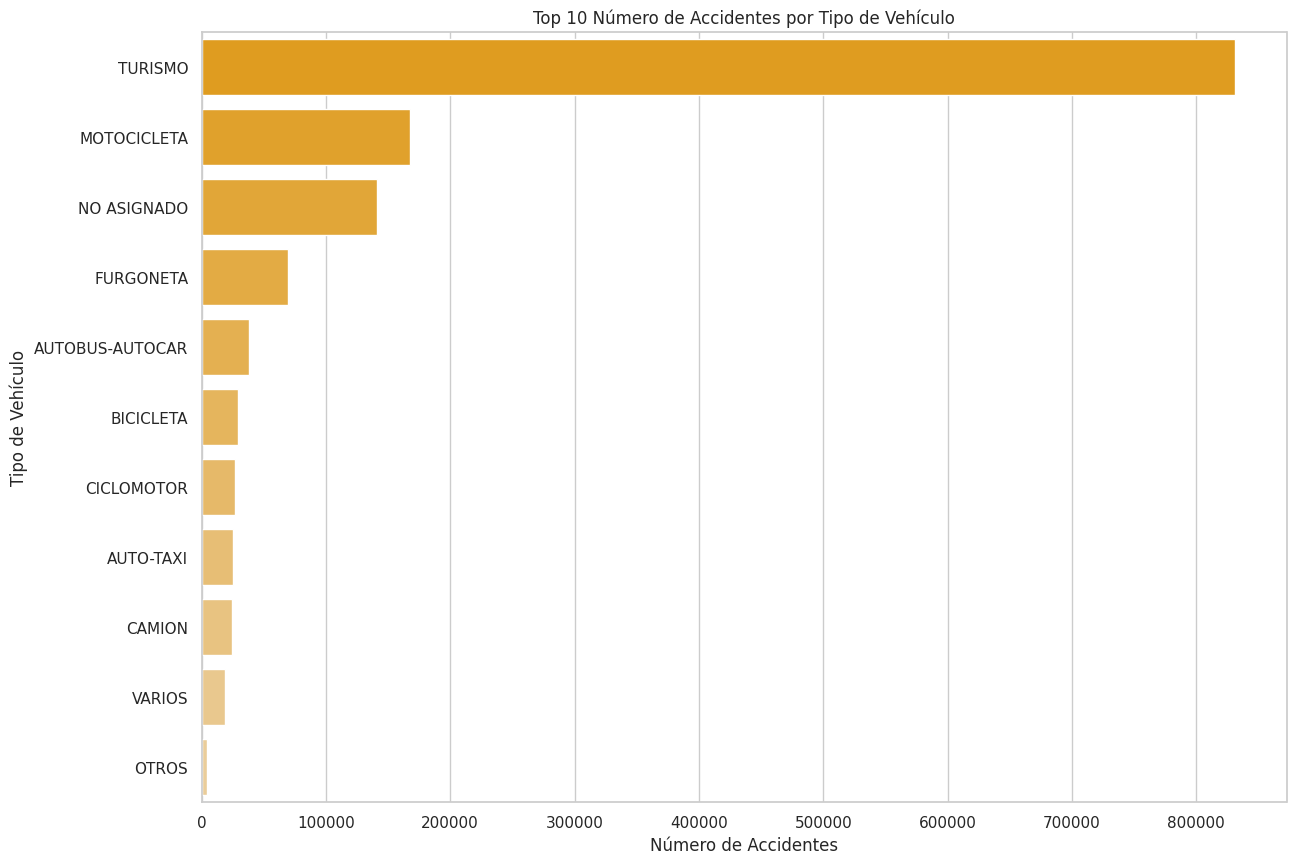

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


db['Tipo Vehiculo'] = db['Tipo Vehiculo'].str.strip().str.upper()

tipo_vehiculo_counts = db['Tipo Vehiculo'].value_counts()


top_10_vehiculos = tipo_vehiculo_counts.nlargest(10).index
db['Tipo Vehiculo Agrupado'] = db['Tipo Vehiculo'].apply(lambda x: x if x in top_10_vehiculos else 'OTROS')


palette = sns.light_palette("orange", reverse=True, n_colors=18)  # Incluye un color adicional para 'Otros'

plt.figure(figsize=(14, 10))


sns.countplot(y='Tipo Vehiculo Agrupado', data=db, order=db['Tipo Vehiculo Agrupado'].value_counts().index, palette=palette)

plt.title('Top 10 Número de Accidentes por Tipo de Vehículo')
plt.xlabel('Número de Accidentes')
plt.ylabel('Tipo de Vehículo')

plt.show()


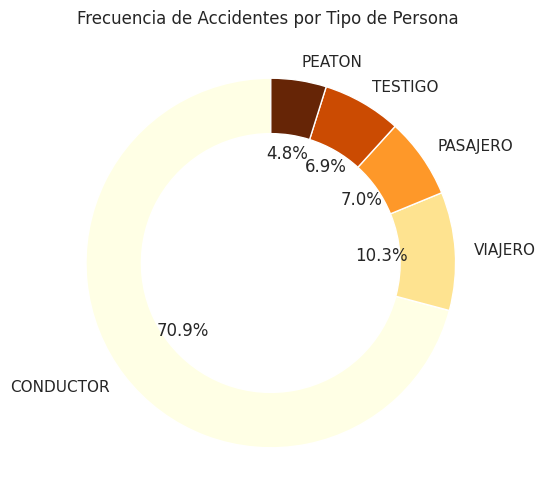

In [ ]:
plt.figure(figsize=(10, 6))
db['TIPO PERSONA'] = db['TIPO PERSONA'].str.strip().str.upper()


filtered_db = db[db['TIPO PERSONA'] != 'DESCONOCIDO']

sizes = filtered_db['TIPO PERSONA'].value_counts()
colors = plt.cm.YlOrBr(np.linspace(0, 1, len(sizes)))


plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Frecuencia de Accidentes por Tipo de Persona ')
plt.show()

<ipython-input-8-2712dbb521aa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='TIPO PERSONA', data=db, order=db['TIPO PERSONA'].value_counts().index, palette=palette)


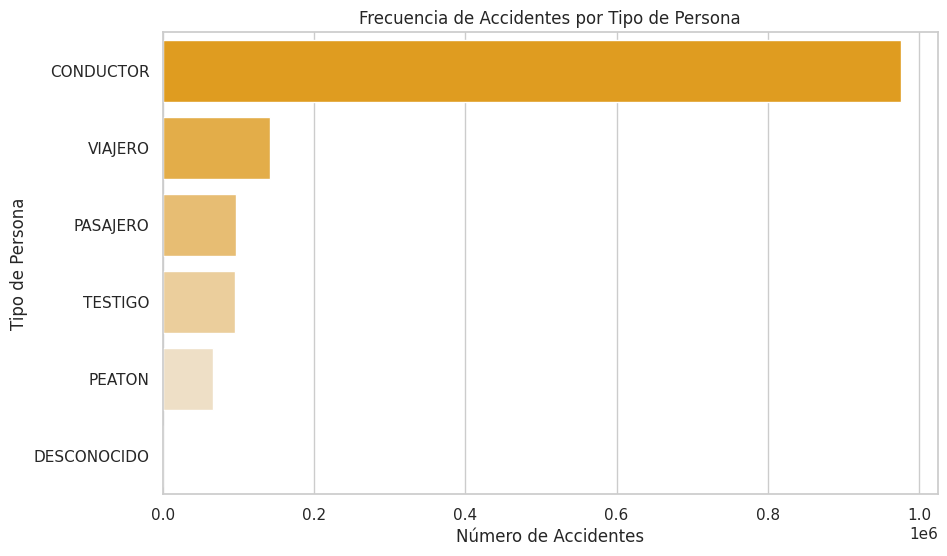

In [ ]:

sns.set(style="whitegrid")


db['TIPO PERSONA'] = db['TIPO PERSONA'].str.strip().str.upper()
palette = sns.light_palette("orange", reverse=True, n_colors=len(db['TIPO PERSONA'].value_counts()))

plt.figure(figsize=(10, 6))

sns.countplot(y='TIPO PERSONA', data=db, order=db['TIPO PERSONA'].value_counts().index, palette=palette)

plt.title('Frecuencia de Accidentes por Tipo de Persona')
plt.xlabel('Número de Accidentes')
plt.ylabel('Tipo de Persona')

plt.show()


<ipython-input-10-6f4eb64d6c54>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='TIPO ACCIDENTE', data=db, order=db['TIPO ACCIDENTE'].value_counts().index, palette=palette)
<ipython-input-10-6f4eb64d6c54>:11: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.countplot(y='TIPO ACCIDENTE', data=db, order=db['TIPO ACCIDENTE'].value_counts().index, palette=palette)


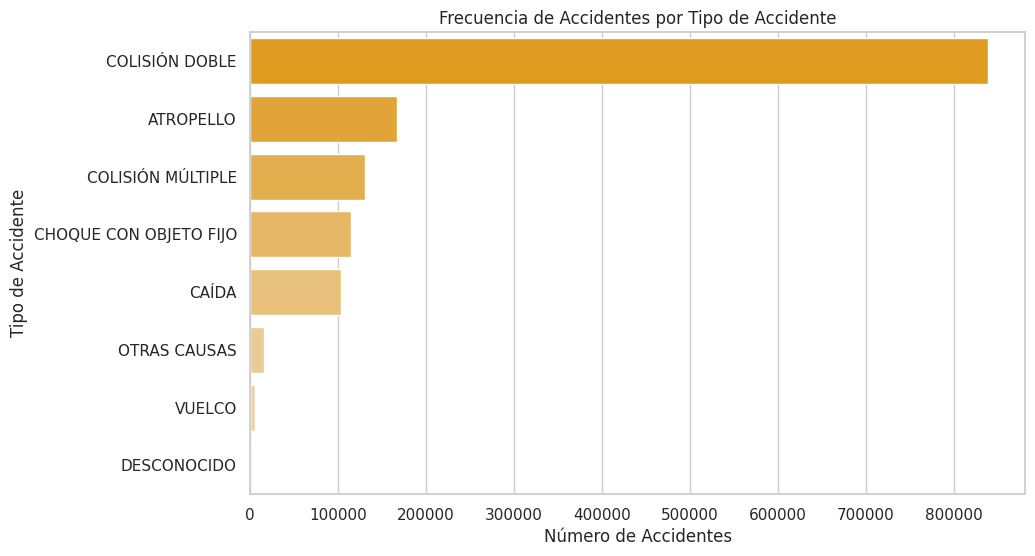

In [ ]:
sns.set(style="whitegrid")

palette = sns.light_palette("orange", reverse=True, n_colors=10)

plt.figure(figsize=(10, 6))

sns.countplot(y='TIPO ACCIDENTE', data=db, order=db['TIPO ACCIDENTE'].value_counts().index, palette=palette)

plt.title('Frecuencia de Accidentes por Tipo de Accidente')
plt.xlabel('Número de Accidentes')
plt.ylabel('Tipo de Accidente')

plt.show()

## 3. Análisis Bivariado/Multivariado
### Ejemplo: Relación entre hora del día y tipo de accidente.

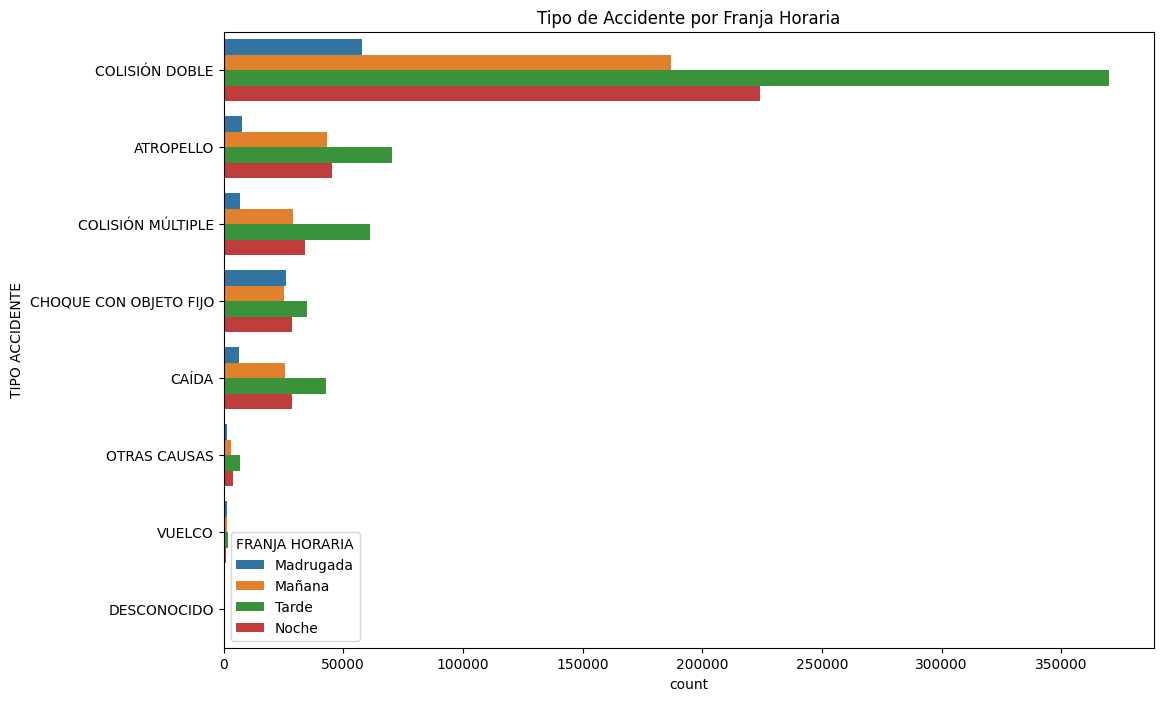

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y='TIPO ACCIDENTE', hue='FRANJA HORARIA', data=db, order=db['TIPO ACCIDENTE'].value_counts().index)
plt.title('Tipo de Accidente por Franja Horaria')
plt.show()


T-STUDENT

t-statistic: -10.417267834565823
p-value: 3.264513753739222e-13


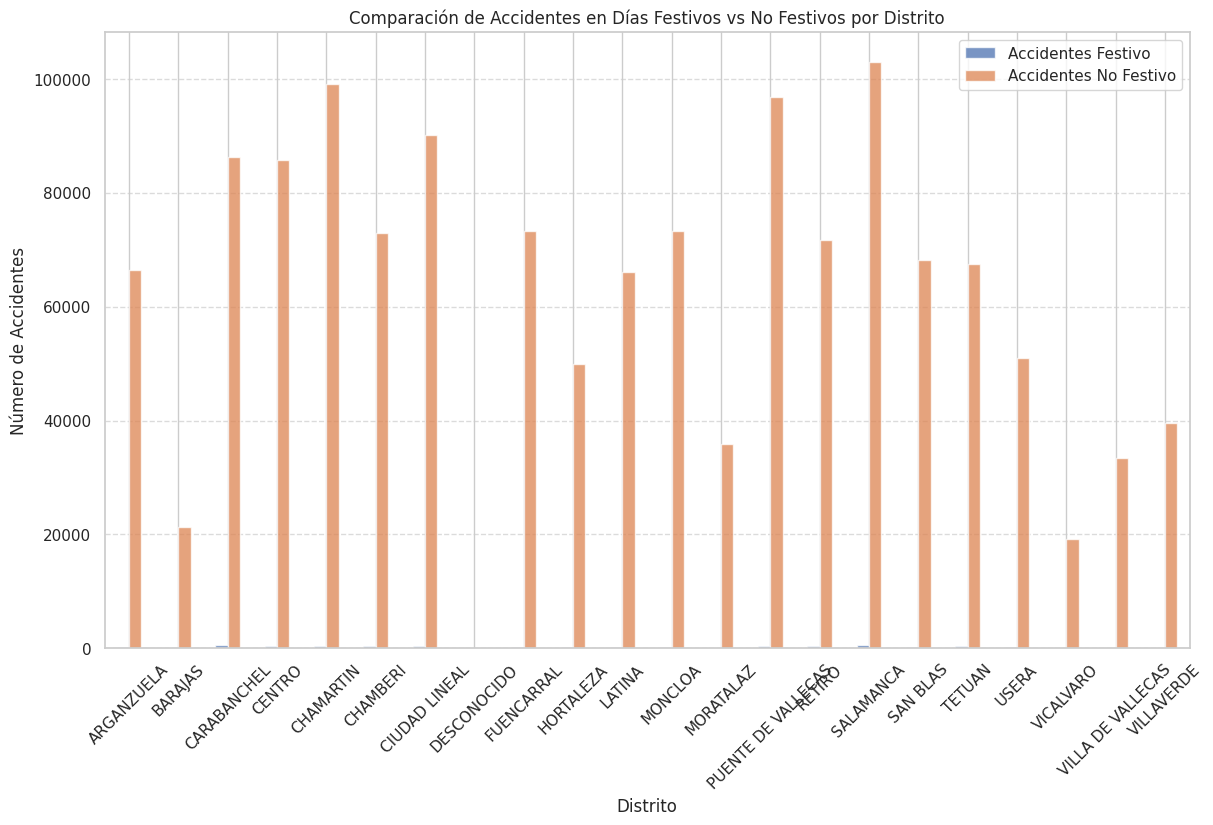

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


accidentes_festivo = db[db['FESTIVO'] == 1]['DISTRITO'].value_counts()
accidentes_no_festivo = db[db['FESTIVO'] == 0]['DISTRITO'].value_counts()

all_distritos = pd.Index.union(accidentes_festivo.index, accidentes_no_festivo.index)
accidentes_festivo = accidentes_festivo.reindex(all_distritos, fill_value=0)
accidentes_no_festivo = accidentes_no_festivo.reindex(all_distritos, fill_value=0)

t_stat, p_value = ttest_ind(accidentes_festivo, accidentes_no_festivo, nan_policy='omit')

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

df_comparison = pd.DataFrame({
    'Accidentes Festivo': accidentes_festivo,
    'Accidentes No Festivo': accidentes_no_festivo
})

df_comparison.plot(kind='bar', figsize=(14, 8), alpha=0.75)
plt.title('Comparación de Accidentes en Días Festivos vs No Festivos por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

